In [2]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

## Properties

In [3]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [4]:
Q = Atomic(var("x4") > 1/40); Q

Atomic(x4 > 0.025)

In [5]:
I = RIF(2, 3)

## Concurrency

In [6]:
import concurrent.futures as fut

pool = fut.ProcessPoolExecutor(4)

thread_pool = fut.ThreadPoolExecutor(1000)

def restart_pool():
    global pool
    
    del pool
    pool = fut.ProcessPoolExecutor(4)

In [7]:
def benchmark_prop(prop, duration, **kwargs):
    agg_metric = instrumentation.AggregateMetric()
    tim, sig = test_monitoring(prop, duration,
                               instrumentor=agg_metric, **kwargs)
    return sig, tim, agg_metric

def schedule_test(prop, duration, **kwargs):
    return {
        'prop': prop,
        'duration': duration,
        'kwargs': kwargs,
        'future': pool.submit(
            benchmark_prop, prop, duration, **kwargs),
    }

from gi.repository import Notify
Notify.init("LBUC Benchmarking")

def notify_when_done(ress, task_description=None):
    fut.wait(futures(ress))
    
    if task_description is None:
        Notify.Notification.new("Benchmark run done!").show()
    else:
        Notify.Notification.new("Benchmark run done!",
                                task_description).show()

def futures(results):
    return [res['future'] for res in results]

def gen_results(n, *args, task_description=None, **kwargs):
    results = [
        schedule_test(*args, **kwargs)
            for _ in range(n)
    ]
    thread_pool.submit(notify_when_done, results, task_description)
    return results

<ipython-input-7-b0324e55b331>:16: PyGIWarning: Notify was imported without specifying a version first. Use gi.require_version('Notify', '0.7') before import to ensure that the right version gets loaded.
  from gi.repository import Notify


## Launch Runs

In [8]:
results_unmasked = gen_results(
    5,
    P & F(I, Q),
    2,
    task_description='Unmasked P & F(Q)',
    use_masks=False,
    symbolic_composition=True,
)

/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False


/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
ode in polynomial ring
_handle_initials called!
crude_roots = False
crude_r

ran "check boolean [unguarded]" 5 times in 0.0013344287872314453
ran "observer.check" 5 times in 0.0018455982208251953
ran "Monitoring atomic x6 > 1" 1 times in 6.8613386154174805
ran "Monitoring atomic x4 > 0.025" 1 times in 11.12839651107788
ran "Monitoring Signal for x6 > 1 & F([2 .. 3], x4 > 0.025)" 1 times in 19.920801639556885
Run done in 72.64236879348755 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3b3c9d5380>, 'use_masks': False, 'symbolic_composition': True}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots 

ran "capturing globals [on exit]" 16 times in 0.0007419586181640625
ran "Running Flow*" 1 times in 66.40260100364685
ran "mask intersect check" 3336 times in 0.007252931594848633
ran "tentative eval" 3248 times in 3.4497931003570557
ran "composing flowpipe" 406 times in 12.385395765304565
ran "whole domain eval" 406 times in 0.8485472202301025
ran "post retrieve" 284 times in 0.3982086181640625
ran "root detection" 284 times in 0.0126190185546875
ran "root amalgamation" 284 times in 0.0007746219635009766
ran "prepare in check" 5 times in 4.8160552978515625e-05
ran "check boolean [unguarded]" 5 times in 0.00162506103515625
ran "observer.check" 5 times in 0.002079010009765625
ran "Monitoring atomic x6 > 1" 1 times in 6.514307737350464
ran "Monitoring atomic x4 > 0.025" 1 times in 10.720663070678711
ran "Monitoring Signal for x6 > 1 & F([2 .. 3], x4 > 0.025)" 1 times in 19.13555669784546
Run done in 85.70650124549866 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric 

signal given bool roots: 1 items in 0.01 seconds
PolyObserver(x4 - 0.025000000000000002?, <flowstar.reachability.Reach object at 0x7f3b3c8f9660>, x2*x6 - 100*x4, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.07 seconds
roots = []
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = []
seg_domain = [2.0000000000000000 .. 3.9418578514811454]
roots = []
seg_domain = [4.0019999999999997 .. 5.0020000000000007]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 3.9577484130859375e-05
ran "restoring globals" 16 times in 0.0013279914855957031
ran "capturing globals [on exit]" 16 times in 0.0006875991821289062
ran "Running Flow*" 1 times in 55.94095492362976
ran "mask intersect check" 3336 times in 0.009215354919433594
ra

ode in polynomial ring
_handle_initials called!
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.07999999999999999..0.12000000000000001]
C = [0.98..1.02]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [2.48..2.52]
C = [0.07999999999999999..0.12000000000000001]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
assigning system with dimension 9
C = [0.58..0.6200000000000001]
resulting system has dimension 9
run within tmv args
C = [1.2799999999999998..1.32]
integrationScheme = 7
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Com

ran "Monitoring atomic x6 > 1" 1 times in 6.488518238067627
ran "Monitoring atomic x4 > 0.025" 1 times in 1.3964052200317383
ran "Monitoring Signal for x6 > 1 & F([2 .. 3], x4 > 0.025)" 1 times in 7.988317489624023
Run done in 69.26861929893494 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3b3e165ac0>, 'use_masks': True, 'symbolic_composition': True}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.

C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 57.62145113100996 sec
PolyObserver(x4 - 0.025000000000000002?, <flowstar.reachability.Reach object at 0x7f3b3c8f9c80>, x2*x6 - 100*x4, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
Computed 1668 flowpipes in 53.54560322200996 sec
PolyObserver(x4 - 0.025000000000000002?, <flowstar.reachability.Reach object at 0x7f3b3c8f9c80>, x2*x6 - 100*x4, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 13.53 se

fprime = x2*x6 - 100*x4
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 1.02 seconds
roots = []
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = []
seg_domain = [2.0000000000000000 .. 5.0020000000000007]
roots = []
signal given bool roots: 1 items in 0.01 seconds
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f3b3c8f9c80>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=True, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 3.0020000000000007], [[2.0020000000000006 .. 2.0020000000000007]]))
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=True, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = []
domain

top-level root detection: 1 items in 0.02 seconds
roots = []
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = []
seg_domain = [2.0020000000000006 .. 2.0020000000000007]
roots = []
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 4.0531158447265625e-05
ran "restoring globals" 16 times in 0.0020189285278320312
ran "capturing globals [on exit]" 16 times in 0.007163524627685547
ran "Running Flow*" 1 times in 61.72284245491028
ran "mask intersect check" 3336 times in 0.010851383209228516
ran "tentative eval" 1003 times in 1.3578581809997559
ran "prepare in check" 2 times in 2.6702880859375e-05
ran "check boolean [unguarded]" 2 times in 0.0013580322265625
ran "observer.check" 2 times in 0.0016069412231445312
ran "Monitoring atomic x4 > 0.025" 1 times in 2.5192956924438477
ran "Monitoring atomic x6 > 1" 1 times in 0.0299222469329834
ran "Monitoring Signal for F([2 .. 3], x4 > 0.025) & x6 > 1" 1 times in 2.9210386276245117
Run done in 64.790455

Run done in 57.47609615325928 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3b3c2d1480>, 'use_masks': True, 'symbolic_composition': True}


In [9]:
results_masked = gen_results(
    5,
    P & F(I, Q),
    2,
    task_description='Masked P & F(Q)',
    use_masks=True,
    symbolic_composition=True,
)

In [10]:
results_unmasked_reversed = gen_results(
    5,
    F(I, Q) & P,
    2,
    task_description='Unmasked F(Q) & P',
    use_masks=False,
    symbolic_composition=True,
)

In [11]:
results_masked_reversed = gen_results(
    5,
    F(I, Q) & P,
    2,
    task_description='Masked F(Q) & P',
    use_masks=True,
    symbolic_composition=True,
)

In [17]:
results_unmasked[0]['future'].result()[0]

Signal([0.0000000000000000 .. 2.0000000000000000], [([0.0000000000000000 .. 2.0000000000000000], False)], mask=None)

# Analysis

In [18]:
import pandas as pd

In [19]:
def total_time_for_key(inst, ks):
    if isinstance(ks, str):
        ks = [ks]

    return sum(inst.total_time(k)
               for k in ks)


def total_times(results, keys, keys_short=None):
    ress = [
        f.result() for f in futures(results)
    ]
    if keys_short is None:
        keys_short = keys
    data = pd.DataFrame({
        short_key: [total_time_for_key(r[2], key) for r in ress]
        for short_key, key in zip(keys_short, keys)
    })
    data.insert(len(keys), 'Total',
                [r[1] for r in ress])
    return data

In [31]:
results_unmasked[0]['future'].result()[2].events

['Precomposing Contexts',
 'restoring globals',
 'capturing globals [on exit]',
 'Running Flow*',
 'mask intersect check',
 'tentative eval',
 'composing flowpipe',
 'whole domain eval',
 'post retrieve',
 'root detection',
 'root amalgamation',
 'prepare in check',
 'check boolean [unguarded]',
 'observer.check',
 'Monitoring atomic x6 > 1',
 'Monitoring atomic x4 > 0.025',
 'Monitoring Signal for x6 > 1 & F([2 .. 3], x4 > 0.025)']

In [32]:
cols_full = [
    'Running Flow*',
    f'Monitoring atomic {P}',
    f'Monitoring atomic {Q}',
    [
        f'Monitoring Signal for {P & F(I, Q)}',
        f'Monitoring Signal for {F(I, Q) & P}',
    ],
    'tentative eval',
    'root detection',
    'composing flowpipe',
]
cols_short = [
    'Flow*', 'P', 'Q', 'P & F(Q)',
    'tentative eval',
    'root detection',
    'composing flowpipe',
]

## Raw results

In [33]:
times_unmasked = total_times(
    results_unmasked,
    cols_full,
    cols_short,
)
times_unmasked

,Flow*,P,Q,P & F(Q),tentative eval,root detection,composing flowpipe,Total
0,54.957115,6.398823,11.615847,20.023592,3.363423,0.012939,13.178518,75.160247
1,52.560380,6.861339,11.128397,19.920802,3.456380,0.013131,13.039886,72.642369
2,66.402601,6.514308,10.720663,19.135557,3.449793,0.012619,12.385396,85.706501
3,55.921553,6.496665,11.230850,19.598908,3.436252,0.012736,12.821838,75.692028
4,58.088646,6.140578,10.925406,17.153409,3.459510,0.012508,12.196652,75.417448


In [34]:
times_unmasked['Flow*'].std()

5.313270573916083

In [35]:
times_masked = total_times(
    results_masked,
    cols_full,
    cols_short,
)
times_masked

,Flow*,P,Q,P & F(Q),tentative eval,root detection,composing flowpipe,Total
0,53.690432,5.729906,1.055569,6.880806,1.739729,0.003819,4.607311,60.738398
1,55.940955,5.075026,1.091391,6.254860,1.688974,0.003637,4.093416,62.351273
2,56.033028,4.972971,1.045680,6.118303,1.643791,0.003727,3.985917,62.326292
3,52.419693,5.780530,1.295873,7.162835,2.011936,0.003822,4.630527,59.740401
4,61.094427,6.488518,1.396405,7.988317,2.221066,0.004241,5.155016,69.268619


In [36]:
times_masked['Flow*'].std()

3.3157016764212637

## Comparison

In [37]:
series = ['masked', 'unmasked',
          'masked_reversed', 'unmasked_reversed']
total_timess = {
    s: total_times(eval(f'results_{s}'), cols_full, cols_short)
    for s in series 
}

In [38]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})

In [39]:
comparison

,masked,unmasked,masked_reversed,unmasked_reversed
Flow*,55.835707,57.586059,58.391944,57.731988
P,5.609390,6.482343,0.029414,4.201454
Q,1.176984,11.124232,1.598513,13.516257
P & F(Q),6.881024,19.166453,2.383356,17.816945
tentative eval,1.861099,3.433072,1.122448,3.335851
root detection,0.003849,0.012787,0.000000,0.012524
composing flowpipe,4.494437,12.724458,0.000000,12.518187
Total,62.884996,76.923719,60.903566,75.731593


In [40]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,5.609390,1.176984
unmasked,6.482343,11.124232
masked_reversed,0.029414,1.598513
unmasked_reversed,4.201454,13.516257


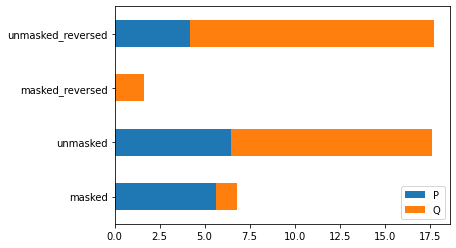

In [41]:
comparison2.plot(kind='barh', stacked=True)

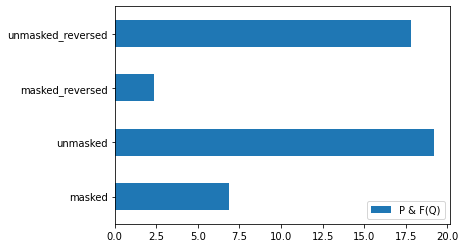

In [42]:
comparison3 = comparison.loc[['P & F(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [43]:
restart_pool()